# Augmentations

In [1]:
# augmentations_to_test = [
#     # "none",
#     # "light",
#     # "medium",
#     # "heavy",
#     # "grayscale",
#     # "randaugment",
#     "mixup",
#     "cutmix"]

<!-- ##### Simple model do test augmentations -->

In [2]:
# def build_model(num_classes):
#     base = keras.applications.EfficientNetB0(
#         input_shape=(224, 224, 3),
#         include_top=False,
#         weights="imagenet",
#         pooling="avg"
#     )
#     base.trainable = False  # You can fine-tune later

#     inputs = keras.Input(shape=(224, 224, 3))
#     x = base(inputs, training=False)
#     x = keras.layers.Dropout(0.2)(x)
#     outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

#     return keras.Model(inputs, outputs)

In [3]:
# def sample_dataset(dataset, fraction=None, num_batches=None, seed=42):
#     """Return a sampled subset of the dataset."""
#     if fraction:
#         dataset = dataset.shuffle(1000, seed=seed)
#         dataset = dataset.take(int(fraction * tf.data.experimental.cardinality(dataset).numpy()))
#     elif num_batches:
#         dataset = dataset.take(num_batches)
#     return dataset

<!-- ##### Loop -->

In [4]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=5,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


In [5]:
# augmentations_to_test = [
#     "none",
#     "light",
#     "medium",
#     "heavy",
#     "grayscale",
#     "randaugment",
#     "mixup",
#     "cutmix"]

In [6]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=15,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


# Testing preprocessing

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import pickle


In [8]:

from classes import *
from functions import *


/Users/brunasimoes/Desktop/nova_ims/2_semester/Trimestral/deep_learning/deep-learning-project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def visualize_batch(dataset, class_names, minority_class=None, num_images=32, sort_by_classname=True):
    """
    Visualize a batch of images with their class labels.

    Parameters:
    - dataset: tf.data.Dataset object
    - class_names: list of class names
    - minority_class: list of minority class names to color in red (others in blue)
    - num_images: number of images to display (default = 32)
    - sort_by_classname: if True, sort images by class name
    """
    for image_batch, label_batch in dataset.take(1):
        label_indices = tf.argmax(label_batch, axis=-1).numpy()
        image_batch_np = image_batch.numpy()
        
        total_images = image_batch_np.shape[0]
        print(f"Total images in this batch: {total_images}")
        print("Sample image shape:", image_batch_np[0].shape)
        print("Sample pixels:", image_batch_np[0][:1, :32, :])

        # Zip images with labels
        image_label_pairs = list(zip(image_batch_np, label_indices))
        
        # Sort by class name if desired
        if sort_by_classname:
            image_label_pairs.sort(key=lambda x: class_names[x[1]])

        # Plot the images
        plt.figure(figsize=(20, 20))
        rows = int(np.ceil(num_images / 8))
        for i in range(min(num_images, len(image_label_pairs))):
            img, label_idx = image_label_pairs[i]
            class_name = class_names[label_idx]
            color = "red" if minority_class and class_name in minority_class else "blue"

            plt.subplot(rows, 8, i + 1)
            plt.imshow(img)
            plt.title(class_name, fontsize=8, color=color)
            plt.axis("off")

        plt.tight_layout()
        plt.show()
        break  # Only show one batch

In [10]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

2025-04-17 14:32:15.038943: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-17 14:32:15.038995: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-17 14:32:15.039025: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-17 14:32:15.039063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-17 14:32:15.039096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
#Load the DataFrames from the .pkl files
with open("../data/train_df.pkl", "rb") as f:
     train_df = pickle.load(f)

with open("../data/val_df.pkl", "rb") as f:
     val_df = pickle.load(f)

with open("../data/test_df.pkl", "rb") as f:
     test_df = pickle.load(f)

with open("../data/train_df_sampled.pkl", "rb") as f:
     train_df_sampled = pickle.load(f)

with open("../data/family_encoder.pkl", "rb") as f:
     family_encoder = pickle.load(f)

In [12]:
minority_class = train_df['family'].value_counts()[train_df['family'].value_counts() < 25].index
minority_class=minority_class.to_list()

In [13]:
# Load dataset (can be oversampled and/or augmented)
train_ds, class_names = preprocess.load_img(
    data_dir="../data/rare_species/train_sampled",
    minority_class=minority_class,
    augment="heavy",  # or any other augment
    oversampling=True,
    shuffle=True
)

Found 4194 files belonging to 202 classes.


2025-04-17 14:32:17.019051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.18029615..1.0384909].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.142614..1.0394775].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2468746..1.0243509].


Total images in this batch: 32
Sample image shape: (224, 224, 3)
Sample pixels: [[[0.4990782  0.42079407 0.40414628]
  [0.5644527  0.48619723 0.46552524]
  [0.55380577 0.48216367 0.45886272]
  [0.5274363  0.45860323 0.43419945]
  [0.52280176 0.45373422 0.42947754]
  [0.54155564 0.4681719  0.4448246 ]
  [0.55888087 0.47639096 0.45140016]
  [0.56107646 0.4691585  0.43878224]
  [0.54958737 0.4512779  0.41708663]
  [0.5459823  0.44292307 0.4115752 ]
  [0.5437114  0.44275957 0.41108635]
  [0.5097531  0.414567   0.37810257]
  [0.48319823 0.38953647 0.35176095]
  [0.5117663  0.4164647  0.3800996 ]
  [0.5441201  0.44285548 0.41143847]
  [0.54571486 0.44283244 0.41123345]
  [0.5501484  0.45200893 0.41787216]
  [0.5613439  0.46972767 0.43958196]
  [0.5584267  0.4763269  0.45149645]
  [0.5407308  0.4676176  0.4442226 ]
  [0.5222674  0.45323592 0.42896172]
  [0.5283626  0.45950833 0.4351123 ]
  [0.5548085  0.48297614 0.45975044]
  [0.56418115 0.48562905 0.4650753 ]
  [0.5409337  0.4547092  0.43631

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0826609].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15934896..1.0474294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.045554306..1.1195761].
2025-04-17 14:32:21.687060: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.083544284..1.163836].
Cl

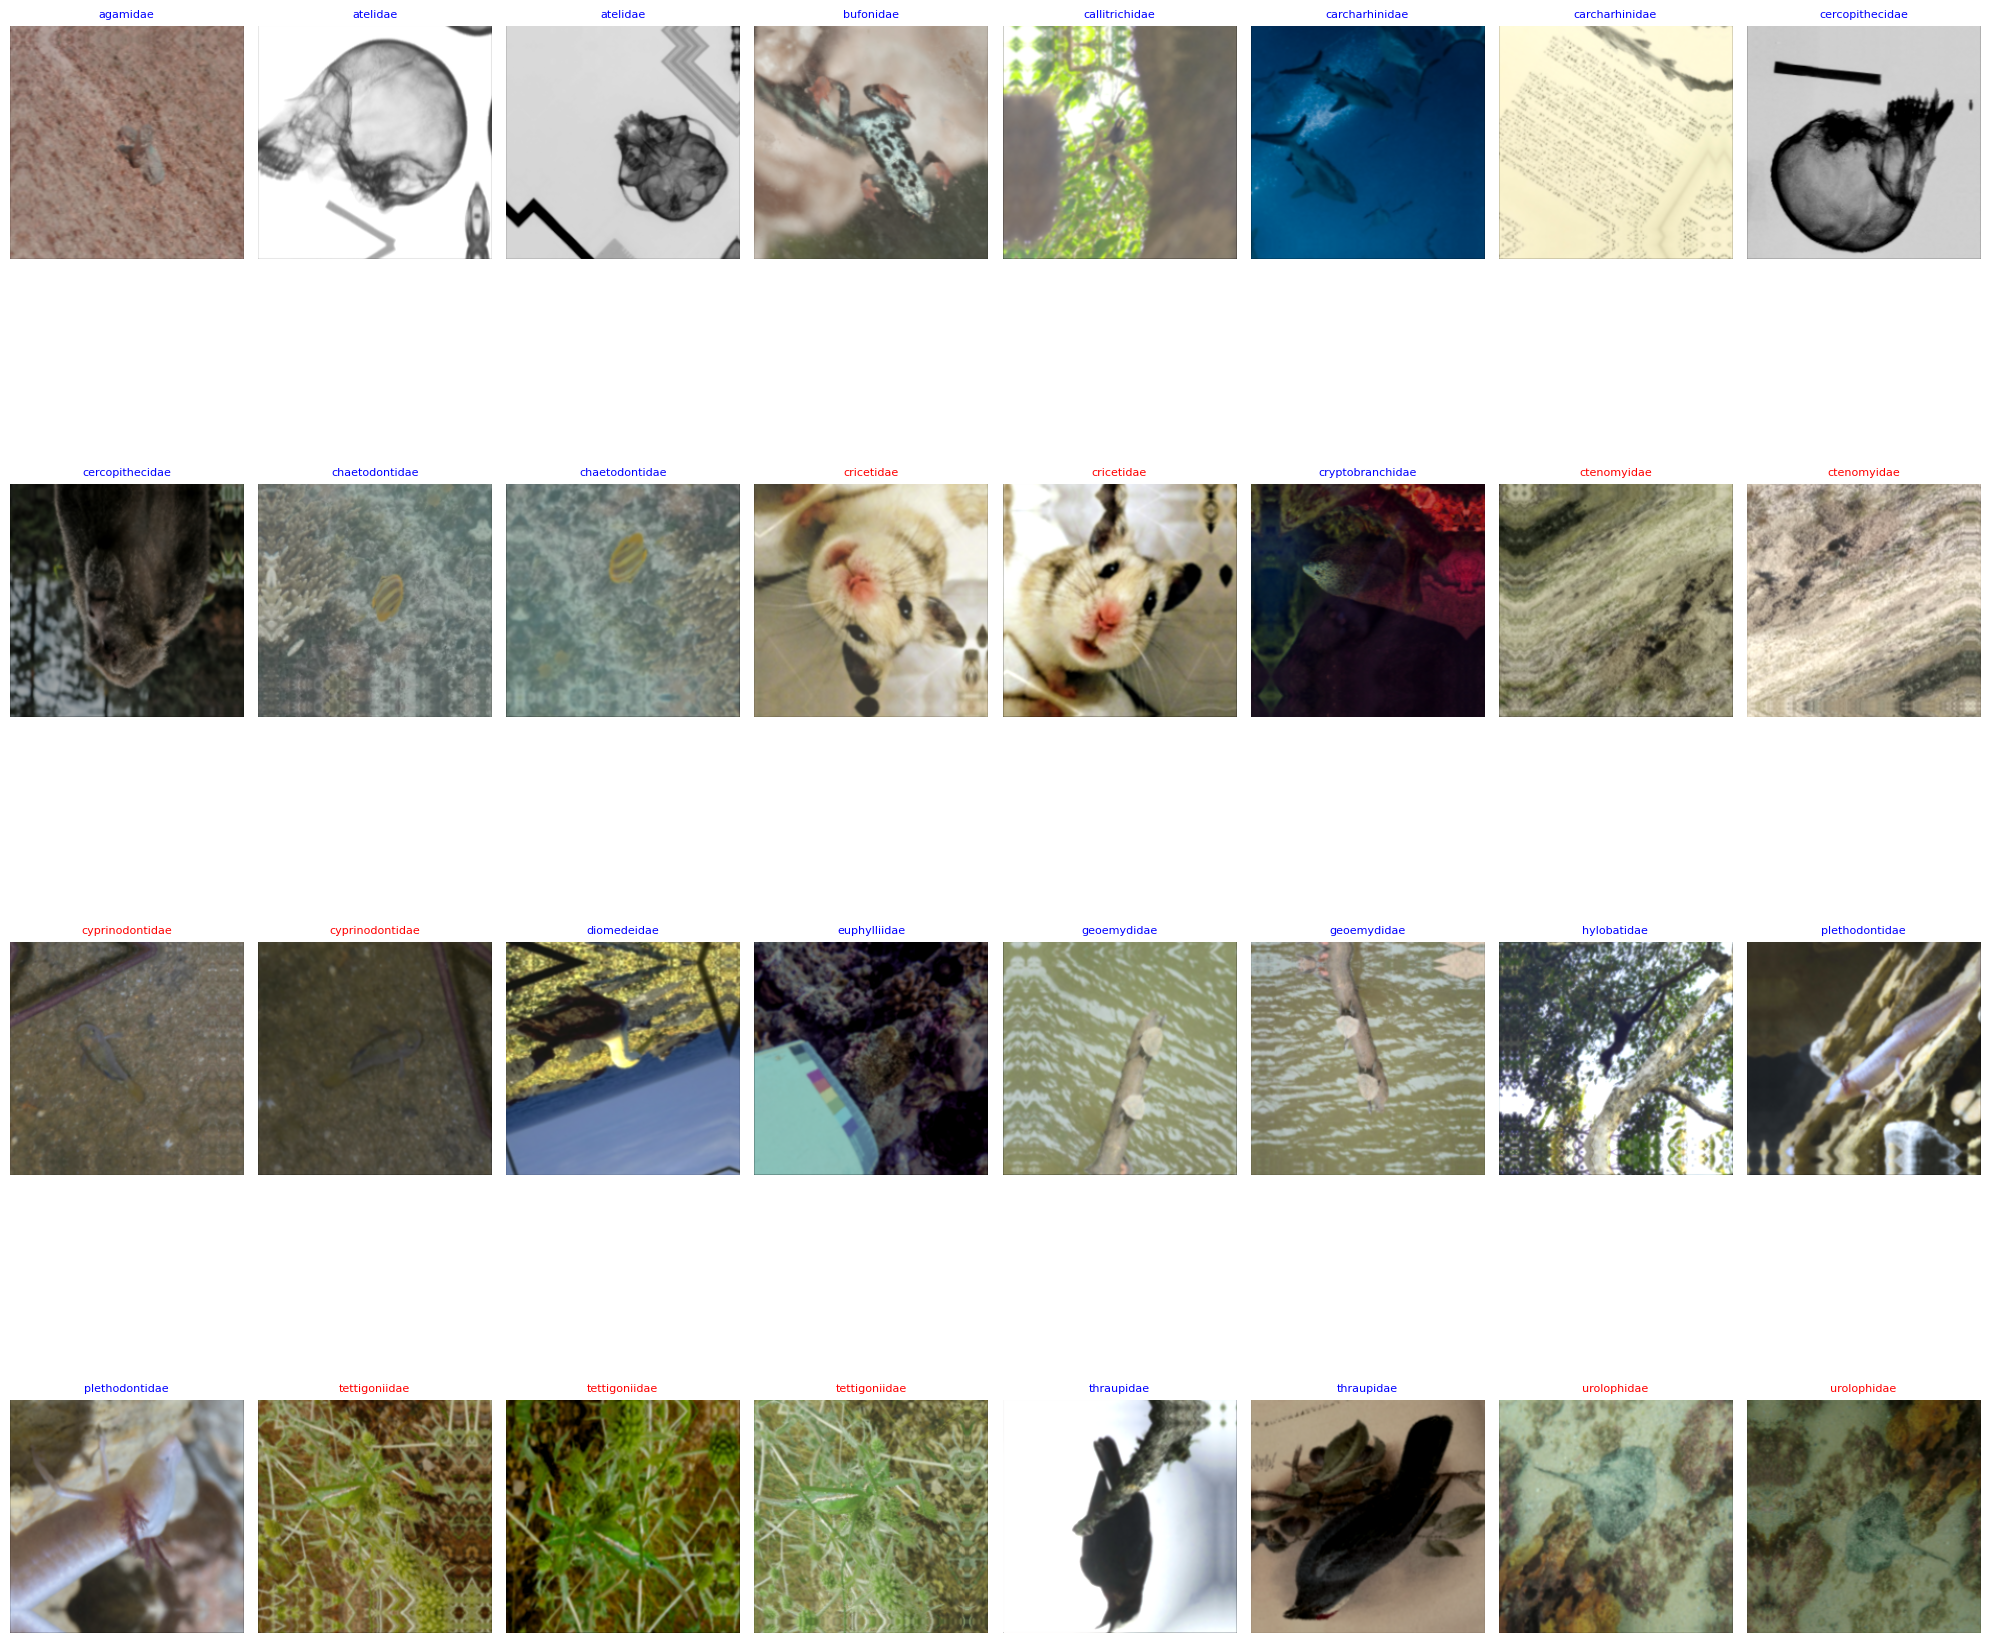

In [14]:
# Visualize a batch
visualize_batch(train_ds, class_names, num_images=32, minority_class=minority_class)